#**Evaluation Metrics**

1. [Regression Metrics](#rm)
    - [MSE (Mean Squared Error)](#mse)
    - [RMSE (Root Mean Squared Error)](#rmse)
    - [MAE (Mean Absolute Error)](#mae)
    - [R-squared](#r-squared)
    - [Adjusted R-squared](#adjusted-r2)
    - [Pearson Correlation](#pearson-correlation)
    - [Spearman Correlation](#spearman-correlation)

2. [Classification Metrics](#cm)
    - [Accuracy](#accuracy)
    - [Precision](#precision)
    - [Recall](#recall)
    - [F1 Score](#f1-score)
    - [Confusion Matrix](#confusion-matrix)
    - [Specificity](#specificity)
    - [Log Loss / Binary Cross Entropy Loss](#log-loss)
    - [ROC Curve and AUC](#roc-auc)


#**1. Regression Metrics**

In [59]:
from sklearn import metrics
dir(metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

## <a id='mse'></a>MSE (Mean Squared Error)
- MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance.

In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error

actual = np.array([2,5,4])
predicted = np.array([2.1,5.3,4.6])

mse = mean_squared_error(actual,predicted)
print('MSE: ', mse)

MSE:  0.15333333333333318


- Lower MSE values indicates better model.

In [61]:
#import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y=  np.array([2,4,6,8,10,12,14,16,18,20])

#split data
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#create and train model
model = LinearRegression()
model.fit(X_train,y_train)

#make prediction
y_pred = model.predict(X_test)

#mse
mse = mean_squared_error(y_test,y_pred)
print('MSE: ', mse)



MSE:  3.944304526105059e-31


In [62]:
import sklearn.model_selection as model_selection
dir(model_selection)

['BaseCrossValidator',
 'BaseShuffleSplit',
 'FixedThresholdClassifier',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit',
 'KFold',
 'LearningCurveDisplay',
 'LeaveOneGroupOut',
 'LeaveOneOut',
 'LeavePGroupsOut',
 'LeavePOut',
 'ParameterGrid',
 'ParameterSampler',
 'PredefinedSplit',
 'RandomizedSearchCV',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'ShuffleSplit',
 'StratifiedGroupKFold',
 'StratifiedKFold',
 'StratifiedShuffleSplit',
 'TimeSeriesSplit',
 'TunedThresholdClassifierCV',
 'ValidationCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classification_threshold',
 '_plot',
 '_search',
 '_split',
 '_validation',
 'check_cv',
 'cross_val_predict',
 'cross_val_score',
 'cross_validate',
 'learning_curve',
 'permutation_test_score',
 'train_test_split',
 'typing',
 'validation_curve']

##<a id='rmse'></a>RMSE (Root Mean Squared Error)
- RMSE is the square root of MSE, representing the standard deviation of the prediction errors. Similar to MSE, lower RMSE values indicate better model performance.

In [63]:
#rmse
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

RMSE:  6.280369834735101e-16


## <a id='mae'></a>MAE (Mean Absolute Error)
- MAE measures the average absolute difference between the predicted values and the actual values. It is less sensitive to outliers compared to MSE or RMSE.

In [64]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae

4.440892098500626e-16

## <a id='r-squared'></a>R-squared
- R-squared measures the proportion of the variance in the target variable that is explained by the model. Higher R-squared values indicate better model fit.

In [65]:
from sklearn.metrics import r2_score

y_true = [3, 1, 2, 7]
y_pred = [2.5, 1.5, 2.5, 8]

r2 = r2_score(y_true, y_pred)
r2


0.9156626506024097

## <a id='adjusted-r2'></a>Adjusted R-squared
The adjusted R-squared is a modified version of R-squared that accounts for predictors that are not significant in a regression model. In other words, the adjusted R-squared shows whether adding additional predictors improve a regression model or not.


>$
\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)
$

Where:
- \( R^2 \) = R-squared (coefficient of determination)
- \( n \) = number of data points (samples)
- \( p \) = number of predictors (features)

In [66]:
r2n = len(y_true)
p = 1

adj_r2 = 1 - (1 - r2) * (r2n - 1) / (r2n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')

Adjusted R-squared: 0.8734939759036146


## <a id='pearson-correlation'></a>Pearson Correlation

**Pearson Correlation** is a statistical measure that calculates the strength and direction of the linear relationship between two variables. The value of the Pearson Correlation coefficient (denoted as **r**) ranges from -1 to 1:
- **r = 1** indicates a perfect positive linear relationship.
- **r = -1** indicates a perfect negative linear relationship.
- **r = 0** indicates no linear relationship between the variables.


>$
r = \frac{ \sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y}) }{ \sqrt{ \sum_{i=1}^{n} (x_i - \overline{x})^2 } \sqrt{ \sum_{i=1}^{n} (y_i - \overline{y})^2 } }
$

Where:
- ($ x_i $) and ( $y_i$ ) are the individual sample points.
- \( $\overline{x}$) and ( $\overline{y}$) are the mean values of \($ x$ \) and \( $y$ \), respectively.
- \( $n$ \) is the number of data points.



In [67]:
import pandas as pd

data = {'x': [10, 12, 13, 15, 18],
        'y': [23, 25, 26, 29, 32]}

df = pd.DataFrame(data)

pearson_corr = df['x'].corr(df['y'], method='pearson')
print(f'Pearson Correlation (using pandas): {pearson_corr}')

correlation_matrix = np.corrcoef(df['x'], df['y'])
pearson_corr_numpy = correlation_matrix[0, 1]
print(f'Pearson Correlation (using numpy): {pearson_corr_numpy}')

Pearson Correlation (using pandas): 0.9970386258843617
Pearson Correlation (using numpy): 0.9970386258843617


**Using pandas**: The `.corr()` method calculates the Pearson correlation coefficient between two columns in a DataFrame.

**Using numpy**: `np.corrcoef()` returns the correlation matrix, where the value at [0, 1] (or [1, 0]) is the Pearson correlation between the two variables.

## <a id='spearman-correlation'></a>Spearman Correlation
Spearman Correlation is a non-parametric measure of the strength and direction of the monotonic relationship between two variables. It assesses how well the relationship between two variables can be described using a monotonic function. Unlike Pearson correlation, Spearman does not assume a linear relationship or normality of the data.

>$
r_s = 1- \frac{6 \sum d_i^2 }{n(n^2-1) }
$

- $r_s$ ​is the Spearman rank correlation coefficient.
- $𝑑_𝑖$ is the difference between the ranks of the corresponding values of the two variables.
- $𝑛$ is the number of data points.

In [68]:
from scipy.stats import spearmanr

# using pandas
spearman_corr = df['x'].corr(df['y'], method='spearman')
print(f'Spearman Correlation (using pandas): {spearman_corr}')

#using scipy's spearmanr
spearman_corr_scipy, _ = spearmanr(df['x'], df['y'])
print(f'Spearman Correlation (using scipy): {spearman_corr_scipy}')


Spearman Correlation (using pandas): 0.9999999999999999
Spearman Correlation (using scipy): 0.9999999999999999


**Using pandas**: The `.corr()` method with method='spearman' calculates the Spearman correlation coefficient.

**Using scipy**: The `spearmanr()` function from scipy.stats also calculates the Spearman rank correlation coefficient.

#**<a id='cm'></a>2. Classification**

## <a id='accuracy'></a>Accuracy
Accuracy is calculated by dividing the number of correct predictions by the total number of predictions.

> ${Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
$

Where:
- \( TP \): True Positives
- \( TN \): True Negatives
- \( FP \): False Positives
- \( FN \): False Negatives

In [69]:
from sklearn.metrics import accuracy_score

y_true = [1,0,1,1]
y_pred = [1,0,0,1]

accuracy = accuracy_score(y_true, y_pred)
accuracy

0.75

## <a id='precision'></a>Precision
Precision is calculated by dividing the number of true positives by the total number of positive predictions.

> $
\text{Precision} = \frac{TP}{TP + FP}
$

Where:
- \( TP \): True Positives
- \( FP \): False Positives


In [70]:
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
precision

1.0

## <a id='recall'></a>Recall
Recall is calculated by dividing the number of true positives by the total number of positive examples.

>$
\text{Recall} = \frac{TP}{TP + FN}
$

Where:
- \( TP \): True Positives
- \( FN \): False Negatives


In [71]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
recall

0.6666666666666666

## <a id='f1-score'></a>F1 Score
The F1 score is a weighted average of precision and recall. It is calculated by taking the harmonic mean of precision and recall.

> $
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$



In [72]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true,y_pred)
f1

0.8

## <a id='confusion-matrix'></a>Confusion Matrix

> $
\begin{matrix}
 & \text{Predicted Positive} & \text{Predicted Negative} \\
\text{Actual Positive} & TP & FN \\
\text{Actual Negative} & FP & TN \\
\end{matrix}
$

Where:
- \( TP \): True Positives
- \( TN \): True Negatives
- \( FP \): False Positives
- \( FN \): False Negatives


In [73]:
from sklearn.metrics import confusion_matrix

confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[1, 0],
       [1, 2]])

## <a id='specificity'></a>Specificity
Specificity measures the proportion of actual negatives that are correctly identified by the model. It is particularly useful in scenarios where the cost of false positives is high, such as in medical diagnostics.


> $
\text{Specificity} = \frac{TN}{TN + FP}
$

Where:
- \( TN \): True Negatives
- \( FP \): False Positives



In [74]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

specificity = tn / (tn + fp)
specificity

1.0

## <a id='log-loss'></a>Log Loss / Binary Cross Entropy Loss

Binary cross-entropy is a loss function used in binary classification problems where the target variable has two possible outcomes, 0 and 1 and it measures the performance of the classification model whose output is a probability is a value between them. The goal of the model is to minimize this loss function during training to improve its predictive accuracy.

>$
\text{Log Loss} = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]$

In [75]:
from sklearn.metrics import log_loss

logloss = log_loss(y_true, y_pred)
print(f'Log Loss: {logloss}')


Log Loss: 9.010913347279288



## <a id='roc-auc'></a>ROC Curve and AUC
**ROC Curve (Receiver Operating Characteristic Curve):**

- A graphical representation of a classifier's performance at various threshold levels.
- Plots the True Positive Rate (TPR) against the False Positive Rate (FPR).
- TPR (Recall): Proportion of actual positives correctly identified.
- FPR: Proportion of actual negatives incorrectly identified as positives.

**Area Under the Curve (AUC):**

- Measures the entire two-dimensional area underneath the ROC curve.
- AUC value ranges from 0 to 1:
  - 1: Perfect classifier
  - 0.5: No discrimination (random guessing)
  - < 0.5: Worse than random guessing
- A higher AUC indicates better model performance in distinguishing between positive and negative classes.
- The AUC (Area Under Curve) score provides an aggregate measure of the model's ability to distinguish between positive and negative classes.

>$True Positive Rate (TPR) / Recall: \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$

>$False Positive Rate (FPR):
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$

In [76]:
make_classification?


In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

#creating dataset
X, y = make_classification(n_samples=100000, n_features=20, random_state=42)

#splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
roc_auc


0.9398923609876685

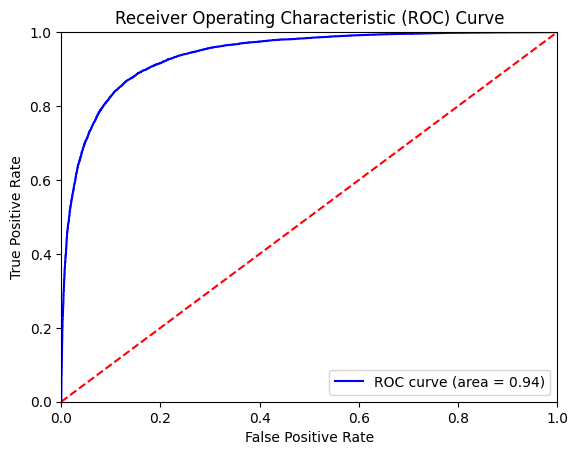

In [78]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Explanation of the functions `roc_curve`, `auc`, and `roc_auc_score` from `sklearn.metrics`.

**1. roc_curve**

roc_curve computes the *True Positive Rate (TPR) and False Positive Rate (FPR)* for different threshold values. It helps in plotting the ROC curve.

Usage:

>`from sklearn.metrics import roc_curve`
>
>`fpr, tpr, thresholds = roc_curve(y_true, y_scores)`

Parameters:

- `y_true`: True binary labels in binary label format (0 and 1).
- `y_scores`: Target scores, can be probability estimates of the positive class.

Returns:

- `fpr`: False Positive Rates.
- `tpr`: True Positive Rates.
- `thresholds`: Threshold values to compute the rates.


**2. auc**

auc computes the area under the ROC curve. It takes the FPR and TPR arrays and calculates the area using the trapezoidal rule.

Usage:

>`from sklearn.metrics import auc`
>
>`roc_auc = auc(fpr, tpr)`

Parameters:

- `fpr`: False Positive Rates from roc_curve.
- `tpr`: True Positive Rates from roc_curve.

Returns:

- `roc_auc`: Area under the ROC curve.

**3. roc_auc_score**


roc_auc_score calculates the ROC AUC score directly from true labels and predicted probabilities.

Usage:

>`from sklearn.metrics import roc_auc_score`
>
>`roc_auc = roc_auc_score(y_true, y_scores)`

Parameters:

- `y_true`: True binary labels in binary label format (0 and 1).
-`y_scores`: Target scores, can be probability estimates of the positive class.

Returns:
- `roc_auc`: AUC score (between 0 and 1).